In [1]:
from __future__ import print_function
from PIL import Image
import random
import torch
import torchvision.utils as vutils
from torch.autograd import Variable
import torchvision.transforms
import numpy as np

import vae_conv_model

In [12]:
model_path = '/media/sk/Lenovo/pytorch/vae/vae_epoch_50_0.pth'
model = vae_conv_model.VAE()
model.load_state_dict(torch.load(model_path, map_location=lambda storage, loc: storage))
model.cuda()
print(model)

VAE (
  (encoder): Sequential (
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU (0.2, inplace)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (4): LeakyReLU (0.2, inplace)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
    (7): LeakyReLU (0.2, inplace)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
    (10): LeakyReLU (0.2, inplace)
    (11): Conv2d(512, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): LeakyReLU (0.01, inplace)
  )
  (decoder): Sequential (
    (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)

In [3]:
def convert_img(img_tensor, nrow):
    img_tensor = img_tensor.cpu()
    grid = vutils.make_grid(img_tensor, nrow=nrow, padding=1)
#     ndarr = grid.mul(0.5).add(0.5).mul(255).byte().transpose(0, 2).transpose(0, 1).numpy()
    ndarr = grid.mul(255).byte().transpose(0, 2).transpose(0, 1).numpy()
    im = Image.fromarray(ndarr)
    return im

### Display Generated Images

(64, 8)


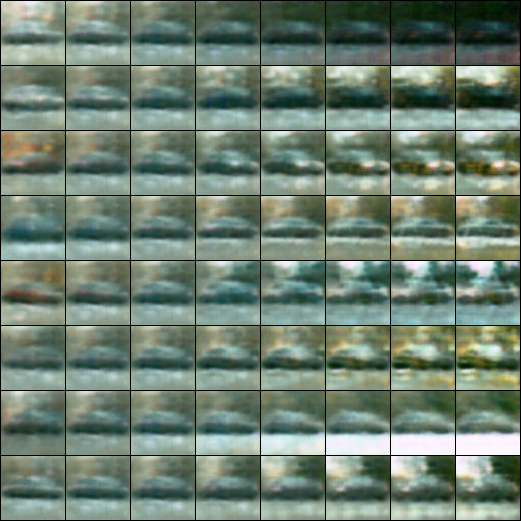

In [15]:
# a batch of images here
# noise_batch = torch.cuda.FloatTensor(64, 3, 64, 64).normal_(0,1)
# noise_batch = Variable(noise_batch)
# fake_batch, mu, logvar = model(noise_batch)

# im = convert_img(fake_batch.data, 8)
# im


# noise_batch = torch.cuda.FloatTensor(64, 32).normal_(0,1)

n = np.full((64,8), 0.5)

print(n.shape)

for i in range(8):
    for j in range(8):
        n[i*8+j][i] = -0.16+j*0.4

noise_batch = torch.cuda.FloatTensor(n)

# n = noise_batch.numpy()



# print(noise_batch.shape())

noise_batch = Variable(noise_batch)
fake_batch = model.decode(noise_batch)

im = convert_img(fake_batch.data, 8)
im

### Image Transition

Transition from images generated by random input **z1** to **z2**, basically it is from the same idea of "face arithmetic".

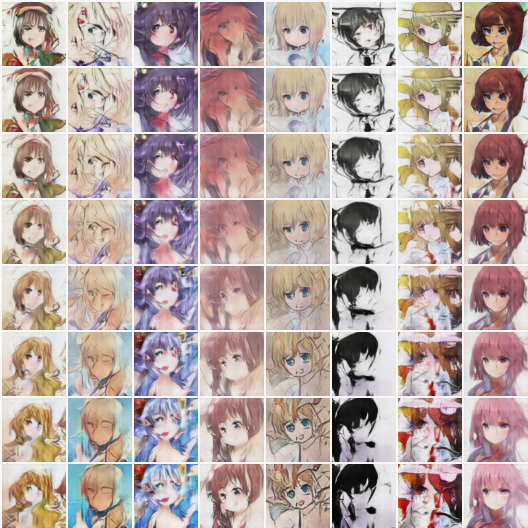

In [7]:
z1 = torch.FloatTensor(8, 100, 1, 1).normal_(0,1)
z2 = torch.FloatTensor(8, 100, 1, 1).normal_(0,1)
dz = (z2 - z1)/7.
z = torch.FloatTensor(64, 100, 1, 1)
for i in range(8):
    z[8*i:8*(i+1),:,:,:] = z1 + i*dz
z = Variable(z)
z_out,_ = netG(z)
z_im = convert_img(z_out.data,8)
z_im